<a href="https://colab.research.google.com/github/maurosterpin/TensorFlow/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.8.0


## Creating data to view and fit

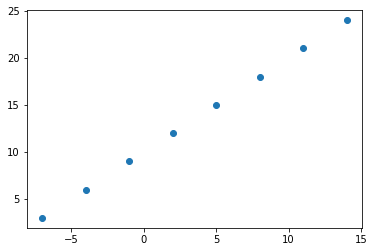

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, Y);

In [ ]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X[0].ndim

0

In [ ]:
X[0], Y[0]

(-7.0, 3.0)

In [ ]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

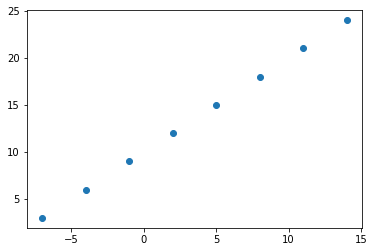

In [ ]:
plt.scatter(X, Y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden laters of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patters between X & Y (features and labels).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 511ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 17ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 17ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check out X and Y
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [ ]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 292ms/step - loss: 14.2813 - mae: 14.2813
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 14.1488 - mae: 14.1488
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 14.0163 - mae: 14.0163
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 13.8838 - mae: 13.8838
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 13.7513 - mae: 13.7513
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 13.6188 - mae: 13.6188
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 13.4863 - mae: 13.4863
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 13.3538 - mae: 13.3538
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 13.2213 - mae: 13.2213
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 13.0888 - mae: 13.0888
Epoch 11/100
1/1 [==============================] - 0s 

In [ ]:
# Reming ourselves of the data
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our model's prediction has improved
model.predict([17.0])

array([[29.817371]], dtype=float32)

In [ ]:
# Let's see if we can improve our model more

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation = None),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), Y, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 355ms/step - loss: 14.2190 - mae: 14.2190
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.5222 - mae: 13.5222
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.8277 - mae: 12.8277
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 12.1351 - mae: 12.1351
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 11.4431 - mae: 11.4431
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.7496 - mae: 10.7496
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 10.0519 - mae: 10.0519
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 9.3466 - mae: 9.3466
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 8.6305 - mae: 8.6305
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.9001 - mae: 7.9001
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 7

In [ ]:
# Let's remind ourselves of the data
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's try to make a prediction
model.predict([17.0])

array([[26.675226]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural network is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:

"Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [3]:
# Make a bigget dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [4]:
# Make labels for the dataset
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

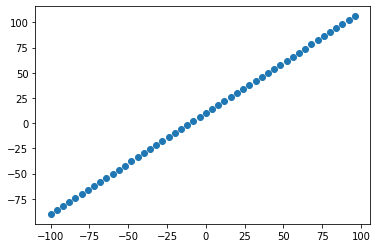

In [5]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, Y)

### The 3 sets...

* **Training set** - the model learns from this data, which is tipically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is tipically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [5]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
Y_train = Y[:40]
X_test = X[40:] # last 10 are testing samples (20% of the data)
Y_test = Y[40:]

len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

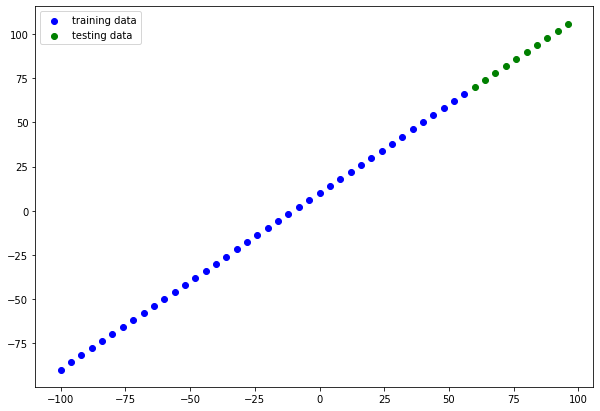

In [ ]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, Y_train, c="b", label="training data")
# Plot test data in green
plt.scatter(X_test, Y_test, c="g", label="testing data")
# Show legend
plt.legend();

In [8]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)          
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(X_train, Y_train, epochs=100)

### Visualizing the model

In [9]:
model.summary()

ValueError: ignored

In [6]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you brin in already learned patterns or parameters from other models during **transfer learning**).

In [9]:
# Let's fit our model to the training data
model.fit(X_train, Y_train, epochs=100, verbose=0)